<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/_feb/fractalv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36424 entries, 0 to 36423
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       36424 non-null  object 
 1   Customer ID                   36424 non-null  object 
 2   Loan Status                   36424 non-null  object 
 3   Current Loan Amount           36424 non-null  int64  
 4   Term                          36424 non-null  object 
 5   Credit Score                  36424 non-null  int64  
 6   Annual Income                 36424 non-null  int64  
 7   Years in current job          36424 non-null  object 
 8   Home Ownership                36424 non-null  object 
 9   Purpose                       36424 non-null  object 
 10  Monthly Debt                  36424 non-null  flo

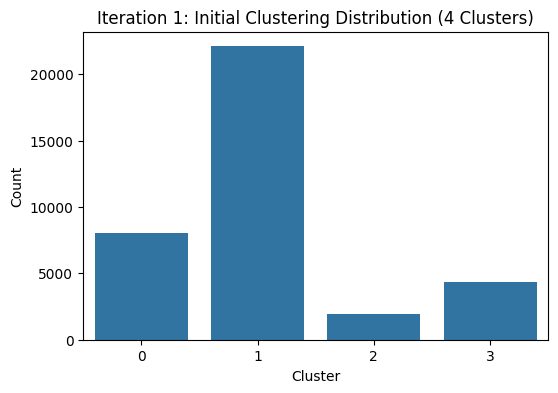

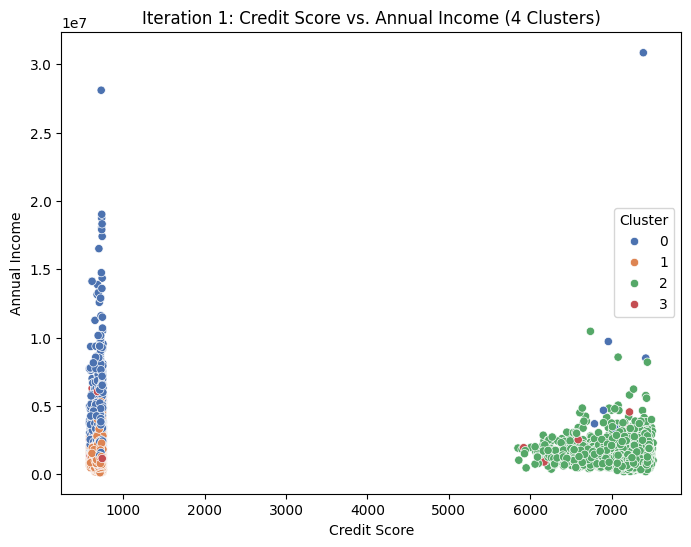


### Iteration 1 (4 Clusters) ###
Sum of Squared Errors (SSE): 272587.11
Silhouette Score: 0.2914



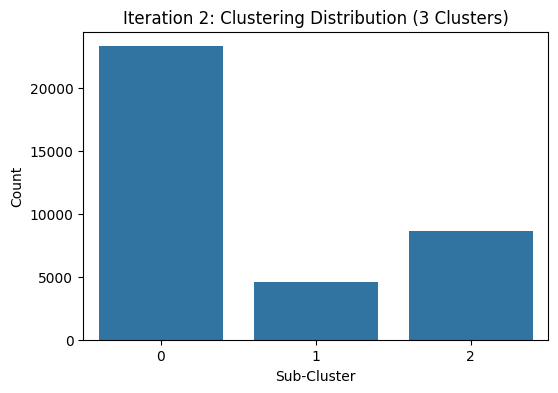

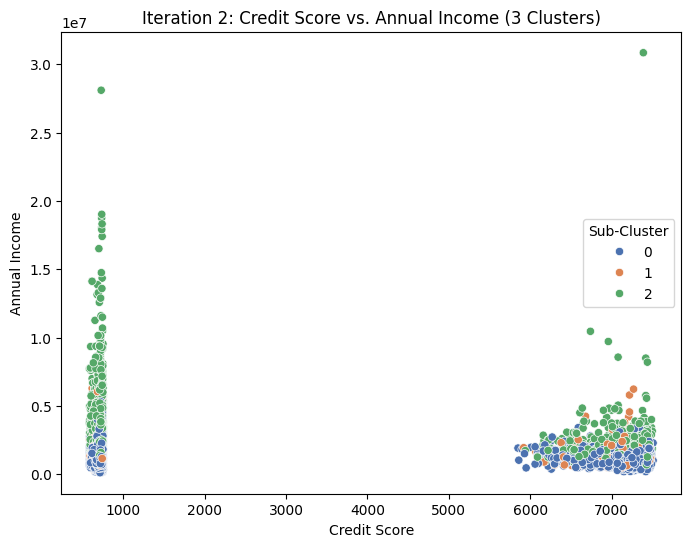


### Iteration 2 (3 Clusters) ###
Sum of Squared Errors (SSE): 304796.23
Silhouette Score: 0.2615



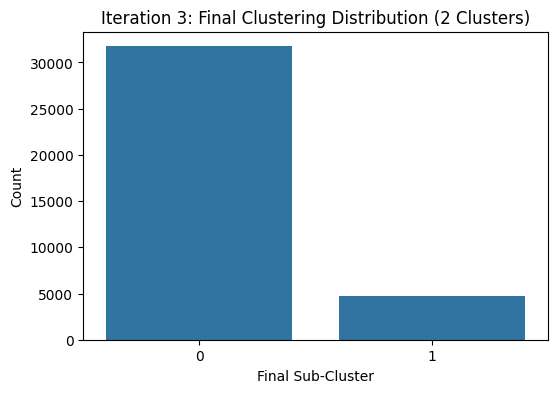

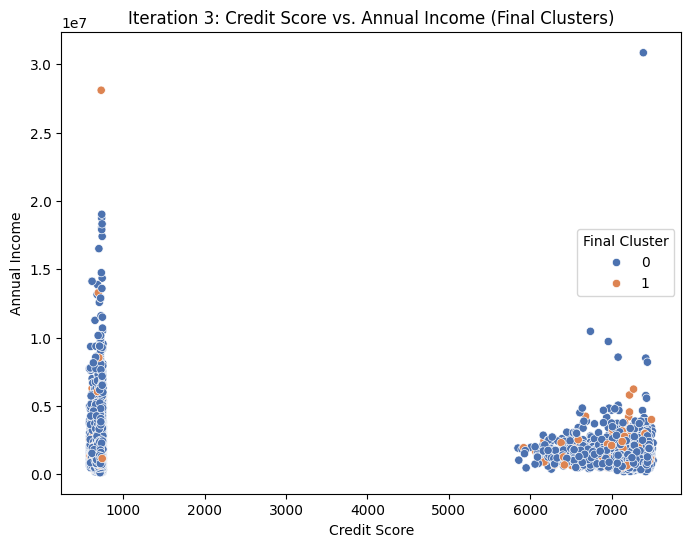


### Iteration 3 (2 Clusters - Golden Cluster Identified) ###
Sum of Squared Errors (SSE): 346798.74
Silhouette Score: 0.3694


### Golden Cluster Detailed Analysis ###
           Creditworthiness_Score  Loan_Risk_Score
Cluster_3                                         
0                    1.461366e+06    -1.461366e+06
1                    1.343853e+06    -1.343853e+06


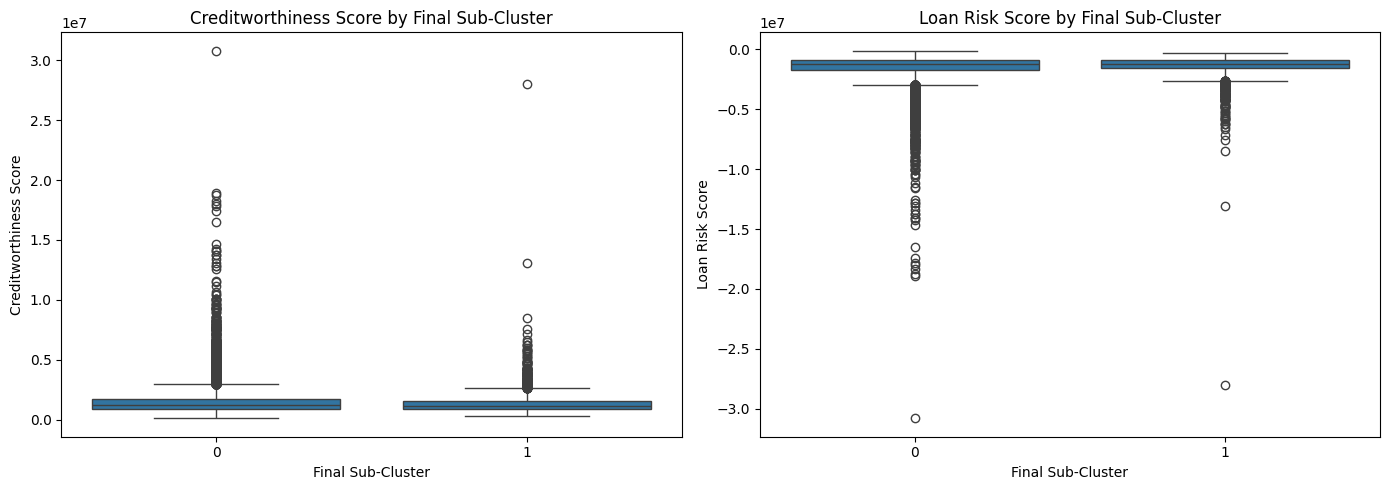

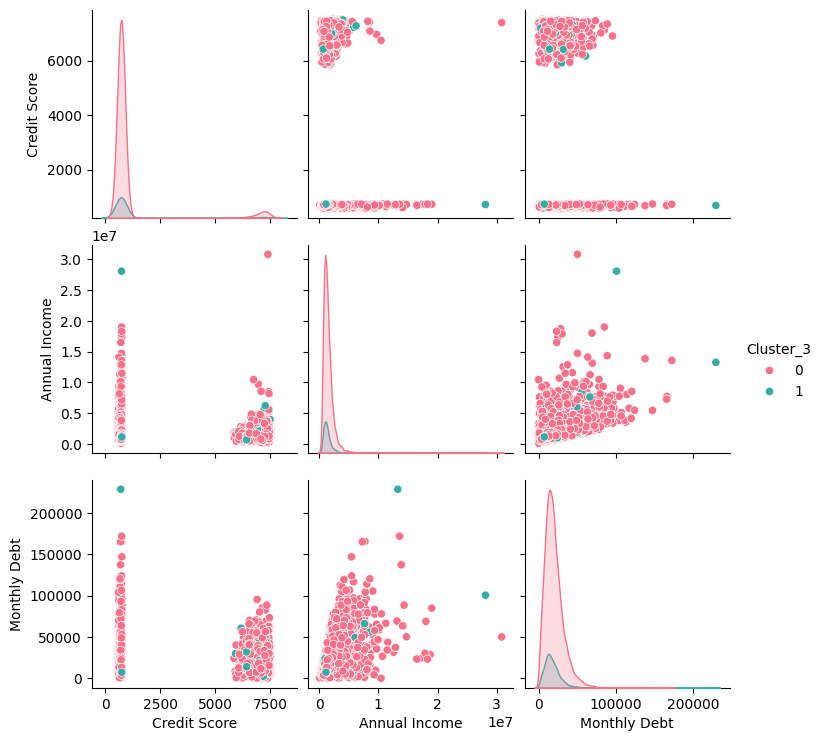


✅ Final dataset saved with additional columns and 36,000 rows intact.


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = "/content/drive/My Drive/Bank_Loan_Approval_Predictor/Bank_Dataset.xlsx"
df = pd.read_excel(file_path)

# Display basic info
df.head()
df.info()

# Selecting relevant numerical columns for clustering
numeric_cols = [
    "Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt",
    "Years of Credit History", "Number of Open Accounts", "Number of Credit Problems",
    "Current Credit Balance", "Maximum Open Credit", "Bankruptcies", "Tax Liens"
]

# Drop rows with missing values in selected numeric columns
df_cleaned = df[numeric_cols].dropna()

# Standardizing the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# ===========================
# Iteration 1: K-Means (4 Clusters)
# ===========================
kmeans_1 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cleaned["Cluster_1"] = kmeans_1.fit_predict(X_scaled)
sse_1 = kmeans_1.inertia_
silhouette_1 = silhouette_score(X_scaled, df_cleaned["Cluster_1"])

# Visualizing Iteration 1
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["Cluster_1"])
plt.title("Iteration 1: Initial Clustering Distribution (4 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["Credit Score"], y=df_cleaned["Annual Income"], hue=df_cleaned["Cluster_1"], palette="deep")
plt.title("Iteration 1: Credit Score vs. Annual Income (4 Clusters)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Cluster")
plt.show()

print("\n### Iteration 1 (4 Clusters) ###")
print(f"Sum of Squared Errors (SSE): {sse_1:.2f}")
print(f"Silhouette Score: {silhouette_1:.4f}\n")

# ===========================
# Iteration 2: K-Means (3 Clusters)
# ===========================
kmeans_2 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned["Cluster_2"] = kmeans_2.fit_predict(X_scaled)
sse_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(X_scaled, df_cleaned["Cluster_2"])

# Visualizing Iteration 2
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["Cluster_2"])
plt.title("Iteration 2: Clustering Distribution (3 Clusters)")
plt.xlabel("Sub-Cluster")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["Credit Score"], y=df_cleaned["Annual Income"], hue=df_cleaned["Cluster_2"], palette="deep")
plt.title("Iteration 2: Credit Score vs. Annual Income (3 Clusters)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Sub-Cluster")
plt.show()

print("\n### Iteration 2 (3 Clusters) ###")
print(f"Sum of Squared Errors (SSE): {sse_2:.2f}")
print(f"Silhouette Score: {silhouette_2:.4f}\n")

# ===========================
# Iteration 3: K-Means (2 Clusters)
# ===========================
kmeans_3 = KMeans(n_clusters=2, random_state=42, n_init=10)
df_cleaned["Cluster_3"] = kmeans_3.fit_predict(X_scaled)
sse_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(X_scaled, df_cleaned["Cluster_3"])

# Visualizing Iteration 3
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["Cluster_3"])
plt.title("Iteration 3: Final Clustering Distribution (2 Clusters)")
plt.xlabel("Final Sub-Cluster")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["Credit Score"], y=df_cleaned["Annual Income"], hue=df_cleaned["Cluster_3"], palette="deep")
plt.title("Iteration 3: Credit Score vs. Annual Income (Final Clusters)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Final Cluster")
plt.show()

print("\n### Iteration 3 (2 Clusters - Golden Cluster Identified) ###")
print(f"Sum of Squared Errors (SSE): {sse_3:.2f}")
print(f"Silhouette Score: {silhouette_3:.4f}\n")

# ===========================
# Objective Functions
# ===========================
penalty_factor = 500

df_cleaned["Creditworthiness_Score"] = (df_cleaned["Credit Score"] + df_cleaned["Annual Income"]) - (
    df_cleaned["Monthly Debt"] + df_cleaned["Number of Credit Problems"] * penalty_factor
)

df_cleaned["Loan_Risk_Score"] = (df_cleaned["Monthly Debt"] + df_cleaned["Number of Credit Problems"] * penalty_factor) - (
    df_cleaned["Credit Score"] + df_cleaned["Annual Income"]
)

# ===========================
# Classify Applicants
# ===========================
def classify_cluster(row):
    if row['Cluster_3'] == 1:  # Assuming Cluster 1 is the Golden Cluster
        return "Golden Cluster"
    elif row['Creditworthiness_Score'] > 0 and row['Loan_Risk_Score'] < 0:
        return "Moderate Cluster"
    else:
        return "High Risk"

df_cleaned["Cluster_Label"] = df_cleaned.apply(classify_cluster, axis=1)

def assign_approval(row):
    if row['Cluster_Label'] == "Golden Cluster":
        return "Approved"
    elif row['Cluster_Label'] == "Moderate Cluster":
        return "Pending"
    else:
        return "Rejected"

df_cleaned["Approval_Status"] = df_cleaned.apply(assign_approval, axis=1)

# ===========================
# Golden Cluster Analysis
# ===========================
golden_cluster_analysis = df_cleaned.groupby("Cluster_3")[
    ["Creditworthiness_Score", "Loan_Risk_Score"]
].mean()

print("\n### Golden Cluster Detailed Analysis ###")
print(golden_cluster_analysis)

# ===========================
# Visualizing Scores
# ===========================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_cleaned["Cluster_3"], y=df_cleaned["Creditworthiness_Score"], ax=axes[0])
axes[0].set_title("Creditworthiness Score by Final Sub-Cluster")
axes[0].set_xlabel("Final Sub-Cluster")
axes[0].set_ylabel("Creditworthiness Score")

sns.boxplot(x=df_cleaned["Cluster_3"], y=df_cleaned["Loan_Risk_Score"], ax=axes[1])
axes[1].set_title("Loan Risk Score by Final Sub-Cluster")
axes[1].set_xlabel("Final Sub-Cluster")
axes[1].set_ylabel("Loan Risk Score")

plt.tight_layout()
plt.show()

# Pairplot for deeper analysis
sns.pairplot(df_cleaned, vars=["Credit Score", "Annual Income", "Monthly Debt"], hue="Cluster_3", palette="husl")
plt.show()

# ===========================
# Save Final Dataset
# ===========================
output_path = "/content/drive/My Drive/Bank_Loan_Approval_Predictor/Updated_Bank_Dataset.xlsx"
df_cleaned.to_excel(output_path, index=False)

print("\n✅ Final dataset saved with additional columns and 36,000 rows intact.")
